# Imports

In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torch
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Define device for torch
use_cuda = True
print("CUDA is available:", torch.cuda.is_available())
device = torch.device("cuda" if (use_cuda and torch.cuda.is_available()) else "cpu")

CUDA is available: True


# Load Dataset
WELFake from HuggingFace

In [3]:
from datasets import load_dataset

dataset = load_dataset("lelexuanzz/WELFake_stylo_feats")
print(dataset)

README.md:   0%|          | 0.00/1.23k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/135M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/62592 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'has_quotes', 'has_url', 'percent_uppercase', 'frequency_punctuation', 'percent_whitespace', 'frequency_words_length_15', 'frequency_words_length_14', 'frequency_words_length_12', 'frequency_words_length_11', 'avg_sentence_length', 'has_1_to_3_urls', 'has_4_to_6_urls', 'has_more_than_6_urls', 'num_exclamations', 'num_questions', 'avg_word_length', 'lexical_diversity', 'proportion_stopwords'],
        num_rows: 62592
    })
})


In [4]:
df = dataset["train"].to_pandas()
print(df)

                                                    text  label  has_quotes  \
0      No comment is expected from Barack Obama Membe...      1           0   
1       Now, most of the demonstrators gathered last ...      1           0   
2      A dozen politically active pastors came here f...      0           0   
3      The RS-28 Sarmat missile, dubbed Satan 2, will...      1           0   
4      All we can say on this one is it s about time ...      1           0   
...                                                  ...    ...         ...   
62587  An email released by WikiLeaks on Sunday appea...      1           0   
62588  WASHINGTON (Reuters) - Hackers believed to be ...      0           0   
62589  You know, because in fantasyland Republicans n...      1           0   
62590  Migrants Refuse To Leave Train At Refugee Camp...      0           1   
62591  MEXICO CITY (Reuters) - Donald Trump’s combati...      0           0   

       has_url  percent_uppercase  frequency_punctu

In [5]:
from sklearn.model_selection import train_test_split

seed = 45

y = df["label"]
x = df.drop(labels = ["label","text"],axis =1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)

display(x_train)
display(y_train)

,has_quotes,has_url,percent_uppercase,frequency_punctuation,percent_whitespace,frequency_words_length_15,frequency_words_length_14,frequency_words_length_12,frequency_words_length_11,avg_sentence_length,has_1_to_3_urls,has_4_to_6_urls,has_more_than_6_urls,num_exclamations,num_questions,avg_word_length,lexical_diversity,proportion_stopwords
6312,0,1,3.210369,107,16.231306,0,1,0,13,17.958333,0,1,0,0,0,4.823389,0.498807,0.427208
1575,0,1,2.939735,46,16.217540,0,0,5,2,20.470588,1,0,0,0,1,4.908555,0.592920,0.418879
34150,0,0,2.004385,49,16.630128,0,1,2,5,23.125000,0,0,0,0,0,4.958254,0.550285,0.413662
20440,0,1,4.370962,47,15.925504,0,0,3,7,21.950000,1,0,0,0,0,5.023364,0.553738,0.401869
49987,0,0,3.140559,178,17.387974,0,0,4,22,16.837209,0,0,0,0,0,4.652239,0.426866,0.466418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12895,0,1,2.826433,42,16.281847,1,0,4,5,17.360000,1,0,0,0,0,4.942446,0.565947,0.484412
60960,0,1,2.833112,46,16.688800,0,0,5,7,18.136364,0,1,0,0,1,4.806283,0.570681,0.476440
6012,0,1,13.148148,30,16.481481,1,0,2,3,18.800000,1,0,0,3,0,4.844444,0.733333,0.388889
6558,1,1,2.282755,131,17.015154,1,0,2,9,19.872340,1,0,0,0,0,4.510293,0.431203,0.489707


6312     1
1575     1
34150    0
20440    0
49987    0
        ..
12895    1
60960    1
6012     1
6558     0
56267    1
Name: label, Length: 50073, dtype: int64

#### Training

In [6]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [7]:
lr_model = LogisticRegression(max_iter=1000, random_state=seed)
lr_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=45)

In [8]:
y_pred = lr_model.predict(x_test)

In [9]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.8057352823707964


In [10]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,recall_score,f1_score


In [11]:
import json
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Real', 'Fake'], output_dict=True)
metrics = {"accuracy": accuracy, "classification_report": report}
# with open('./logs/lr_beforetuning_metrics.json', 'w') as f:
#     json.dump(metrics, f, indent=4)


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      6984
           1       0.81      0.74      0.77      5535

    accuracy                           0.81     12519
   macro avg       0.81      0.80      0.80     12519
weighted avg       0.81      0.81      0.80     12519



In [12]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1score)

welfake = {"Accuracy:":accuracy,"Precision:":precision,"Recall:":recall,"F1-Score:": f1score}
metrics={"welfake": welfake}

Accuracy: 0.8057352823707964
Precision: 0.8077762348740329
Recall: 0.7356820234869015
F1-Score: 0.7700453857791225


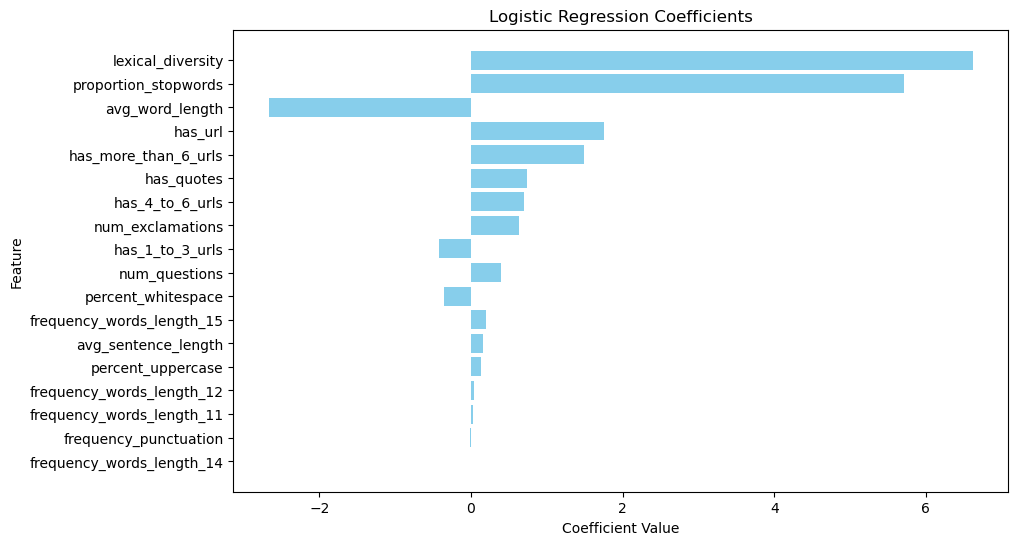

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract coefficients and feature names
coefficients = lr_model.coef_[0]
features = x_train.columns

# Create a DataFrame for better visualization
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Sort by absolute value of coefficients
coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

### HyperParam tuning

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,ConfusionMatrixDisplay

# Define the parameter grid for C
param_grid = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'penalty': ['l1', 'l2'],  # Try different regularization types
    'solver': ['liblinear']  # Works well with both L1 and L2
}

# Set up GridSearchCV
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=seed), 
                           param_grid, 
                           cv=5, 
                           scoring=['accuracy', 'precision', 'recall', 'f1'],
                           refit='f1')

# Fit the model
grid_search.fit(x_train, y_train)

# Print the best parameters and cross-validation accuracy
print("\nBest parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.4f}".format(grid_search.best_score_))

# Evaluate the model with the best parameters
best_lr = grid_search.best_estimator_
y_pred_best = best_lr.predict(x_test)


Best parameters found:  {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation accuracy: 0.7632



Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      6984
           1       0.81      0.73      0.77      5535

    accuracy                           0.80     12519
   macro avg       0.80      0.80      0.80     12519
weighted avg       0.80      0.80      0.80     12519


Confusion Matrix:


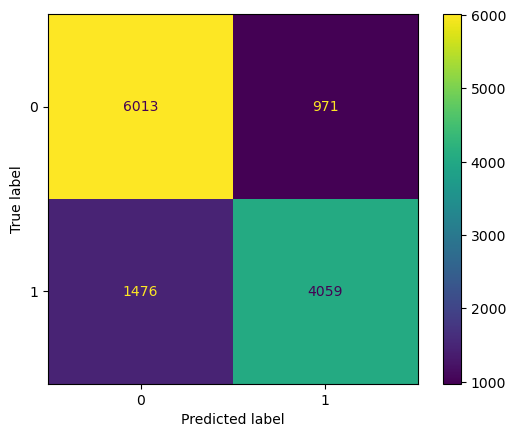

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_best)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [16]:
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1score = f1_score(y_test, y_pred_best)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1score)

tuning = {"Accuracy:":accuracy,"Precision:":precision,"Recall:":recall,"F1-Score:": f1score}
metrics["after tuing"] = tuning

Accuracy: 0.8045371036025242
Precision: 0.8069582504970179
Recall: 0.7333333333333333
F1-Score: 0.7683861807856128


### Test dataset

In [17]:
test_dataset = load_dataset("lelexuanzz/Gossipcop_Politifact_Test_Stylo")
print(test_dataset)

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'has_quotes', 'has_url', 'percent_uppercase', 'frequency_punctuation', 'percent_whitespace', 'frequency_words_length_15', 'frequency_words_length_14', 'frequency_words_length_12', 'frequency_words_length_11', 'avg_sentence_length', 'has_1_to_3_urls', 'has_4_to_6_urls', 'has_more_than_6_urls', 'num_exclamations', 'num_questions', 'avg_word_length', 'lexical_diversity', 'proportion_stopwords'],
        num_rows: 6900
    })
})


In [18]:
test_df = test_dataset["train"].to_pandas()
display(test_df)


y_test_set = test_df["label"]
x_test_set = test_df.drop(labels=["label", "text"], axis=1)
display(x_test_set)
display(y_test_set)

,text,label,has_quotes,has_url,percent_uppercase,frequency_punctuation,percent_whitespace,frequency_words_length_15,frequency_words_length_14,frequency_words_length_12,frequency_words_length_11,avg_sentence_length,has_1_to_3_urls,has_4_to_6_urls,has_more_than_6_urls,num_exclamations,num_questions,avg_word_length,lexical_diversity,proportion_stopwords
0,The media reported on “5 TikTok dances you can...,0,1,0,5.102041,32,17.040816,0,1,0,3,14.916667,0,0,0,0,2,4.482558,0.651163,0.401163
1,"""Over 240,000 'unverified' ballots have alread...",0,1,0,3.068897,181,15.636029,4,6,26,10,18.271186,0,0,0,2,0,5.078619,0.390221,0.423778
2,"Says ""Ron Johnson is making excuses for rioter...",1,1,1,3.742204,224,16.468666,0,3,12,7,16.619718,0,0,1,3,2,4.761525,0.428191,0.425532
3,“We have seen over the last 10 years ... under...,0,1,1,3.492849,107,16.529153,0,2,3,7,16.410256,0,1,0,0,0,4.758564,0.409462,0.419250
4,“I don’t get involved in the hiring and firing...,0,1,0,3.040541,139,16.394026,3,10,1,16,19.816327,0,0,0,0,0,4.737173,0.387435,0.409424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6895,Wedding Album: Dancing with the Stars Pro Lind...,0,0,0,7.645260,5,18.042813,0,0,0,1,20.666667,0,0,0,1,0,4.283333,0.816667,0.483333
6896,WATCH: Sneak Peek: Arizona's Furious Alex Atta...,0,0,0,9.923664,25,16.793893,0,0,0,0,23.000000,0,0,0,1,0,4.216495,0.690722,0.371134
6897,Mary Kay Letourneau 'Hopeful' She Can Fix Marr...,0,0,0,3.754171,94,15.656285,0,1,5,1,16.216216,0,0,0,0,1,4.602585,0.500808,0.462036
6898,Charlize Theron still upset Aeon Flux didn’t w...,0,0,0,3.329065,36,17.669654,0,0,0,1,18.250000,0,0,0,0,0,4.104730,0.577703,0.483108


,has_quotes,has_url,percent_uppercase,frequency_punctuation,percent_whitespace,frequency_words_length_15,frequency_words_length_14,frequency_words_length_12,frequency_words_length_11,avg_sentence_length,has_1_to_3_urls,has_4_to_6_urls,has_more_than_6_urls,num_exclamations,num_questions,avg_word_length,lexical_diversity,proportion_stopwords
0,1,0,5.102041,32,17.040816,0,1,0,3,14.916667,0,0,0,0,2,4.482558,0.651163,0.401163
1,1,0,3.068897,181,15.636029,4,6,26,10,18.271186,0,0,0,2,0,5.078619,0.390221,0.423778
2,1,1,3.742204,224,16.468666,0,3,12,7,16.619718,0,0,1,3,2,4.761525,0.428191,0.425532
3,1,1,3.492849,107,16.529153,0,2,3,7,16.410256,0,1,0,0,0,4.758564,0.409462,0.419250
4,1,0,3.040541,139,16.394026,3,10,1,16,19.816327,0,0,0,0,0,4.737173,0.387435,0.409424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6895,0,0,7.645260,5,18.042813,0,0,0,1,20.666667,0,0,0,1,0,4.283333,0.816667,0.483333
6896,0,0,9.923664,25,16.793893,0,0,0,0,23.000000,0,0,0,1,0,4.216495,0.690722,0.371134
6897,0,0,3.754171,94,15.656285,0,1,5,1,16.216216,0,0,0,0,1,4.602585,0.500808,0.462036
6898,0,0,3.329065,36,17.669654,0,0,0,1,18.250000,0,0,0,0,0,4.104730,0.577703,0.483108


0       0
1       0
2       1
3       0
4       0
       ..
6895    0
6896    0
6897    0
6898    0
6899    0
Name: label, Length: 6900, dtype: int64

In [19]:
y_test_pred = best_lr.predict(x_test_set)

In [20]:
accuracy = accuracy_score(y_test_set, y_test_pred)
precision = precision_score(y_test_set, y_test_pred)
recall = recall_score(y_test_set, y_test_pred)
f1score = f1_score(y_test_set, y_test_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1score)

tuning = {"Accuracy:":accuracy,"Precision:":precision,"Recall:":recall,"F1-Score:": f1score}
metrics["test dataset"] = tuning

Accuracy: 0.47202898550724637
Precision: 0.301303425280388
Recall: 0.4262435677530017
F1-Score: 0.3530456402060025


### Recursive Feature Elimination

In [21]:
from sklearn.feature_selection import RFE

def rescursive_feature_pruning(model, x, y, max_features=None):
    rfe = RFE(estimator = model, n_features_to_select =max_features or 1, step=1)
    rfe.fit(x,y)

       # Get selected features
    selected_features = x.columns[rfe.support_]
    
    # Get ranking of features
    feature_ranking = pd.DataFrame({
        'feature': x.columns,
        'rank': rfe.ranking_
    }).sort_values(by='rank')

    return selected_features.tolist(), feature_ranking

In [22]:
top_features, ranking_df = rescursive_feature_pruning(best_lr, x_train, y_train, max_features=10)

print("Selected Top Features:")
print(top_features)

print("\nFeature Rankings:")
print(ranking_df)
display(x_train[top_features])


Selected Top Features:
['has_quotes', 'has_url', 'frequency_words_length_15', 'has_4_to_6_urls', 'has_more_than_6_urls', 'num_exclamations', 'num_questions', 'avg_word_length', 'lexical_diversity', 'proportion_stopwords']

Feature Rankings:
                      feature  rank
0                  has_quotes     1
15            avg_word_length     1
14              num_questions     1
13           num_exclamations     1
12       has_more_than_6_urls     1
11            has_4_to_6_urls     1
16          lexical_diversity     1
17       proportion_stopwords     1
5   frequency_words_length_15     1
1                     has_url     1
4          percent_whitespace     2
9         avg_sentence_length     3
2           percent_uppercase     4
8   frequency_words_length_11     5
7   frequency_words_length_12     6
3       frequency_punctuation     7
10            has_1_to_3_urls     8
6   frequency_words_length_14     9


,has_quotes,has_url,frequency_words_length_15,has_4_to_6_urls,has_more_than_6_urls,num_exclamations,num_questions,avg_word_length,lexical_diversity,proportion_stopwords
6312,0,1,0,1,0,0,0,4.823389,0.498807,0.427208
1575,0,1,0,0,0,0,1,4.908555,0.592920,0.418879
34150,0,0,0,0,0,0,0,4.958254,0.550285,0.413662
20440,0,1,0,0,0,0,0,5.023364,0.553738,0.401869
49987,0,0,0,0,0,0,0,4.652239,0.426866,0.466418
...,...,...,...,...,...,...,...,...,...,...
12895,0,1,1,0,0,0,0,4.942446,0.565947,0.484412
60960,0,1,0,1,0,0,1,4.806283,0.570681,0.476440
6012,0,1,1,0,0,3,0,4.844444,0.733333,0.388889
6558,1,1,1,0,0,0,0,4.510293,0.431203,0.489707


In [23]:
# Fit the model
grid_search.fit(x_train[top_features], y_train)

# Print the best parameters and cross-validation accuracy
print("\nBest parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.4f}".format(grid_search.best_score_))

# Evaluate the model with the best parameters
best_lr = grid_search.best_estimator_
y_pred_best = best_lr.predict(x_test[top_features])


Best parameters found:  {'C': 100.0, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation accuracy: 0.7134


In [24]:
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1score = f1_score(y_test, y_pred_best)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1score)

tuning = {"Accuracy:":accuracy,"Precision:":precision,"Recall:":recall,"F1-Score:": f1score}
metrics["feature elimination"] = tuning

Accuracy: 0.7579678888090103
Precision: 0.750049910161709
Recall: 0.6787714543812104
F1-Score: 0.7126327769347496


### Results on Test Set

In [25]:
y_test_pred_new = best_lr.predict(x_test_set[top_features])

In [26]:
accuracy = accuracy_score(y_test_set, y_test_pred_new)
precision = precision_score(y_test_set, y_test_pred_new)
recall = recall_score(y_test_set, y_test_pred_new)
f1score = f1_score(y_test_set, y_test_pred_new)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1score)

tuning = {"Accuracy:":accuracy,"Precision:":precision,"Recall:":recall,"F1-Score:": f1score}
metrics["feature elimination test"] = tuning

Accuracy: 0.5139130434782608
Precision: 0.35930616740088106
Recall: 0.5596054888507719
F1-Score: 0.43762575452716296


In [27]:
import pickle

pickle.dump(best_lr, open("models/iter2_lr_model", 'wb'))
print("Model saved as iter2_lr_model")

Model saved as iter2_lr_model


In [28]:
import json
# Store all results
with open('./results/iter2_lrmetrics.json', 'w') as f:
     json.dump(metrics, f, indent=4)

In [29]:
#test to see if model can be loaded

loaded_model = pickle.load(open('models/iter2_lr_model', 'rb'))

load_predict = loaded_model.predict(x_test_set[top_features])

accuracy = accuracy_score(y_test_set, load_predict)
precision = precision_score(y_test_set, load_predict)
recall = recall_score(y_test_set, load_predict)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.5139130434782608
Precision: 0.35930616740088106
Recall: 0.5596054888507719
